In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [3]:
def f(wt,Im):
    return abs(Im*(m.sin(wt)))

In [3]:
X=np.linspace(-m.pi,m.pi,100)
Y=[]
for i in range(0,len(X)):
    Y.append(f(X[i],5))

In [4]:
Im=5
a0 = (4*Im)/m.pi
def an(n):
    if n==1:
        y=0
    else:
        y=(-2*Im)*(m.cos(n*m.pi)+1)/((n**2 -1)*m.pi)
    return y
def bn(n):
    return 0 

In [5]:
def Fourierseries(wt,n):
    sum = a0/2
    for i in range(1,n+1):
        sum = sum + an(i)*(m.cos(i*wt)) 
    return sum

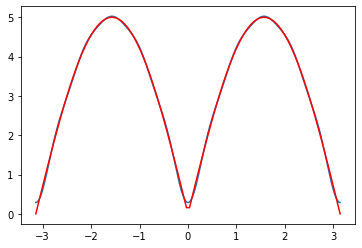

In [7]:
X1=np.linspace(-1*m.pi,1*m.pi,1000)
Y1=[]
for i in X1:
    Y1.append(Fourierseries(i,10))
plt.plot(X1,Y1)

plt.plot(X,Y,'r')
plt.show()

# Writing fourier series for any function
# 1) Using simpson rule for integration

In [4]:
def f(x):
    return abs(np.exp(x))

In [5]:
X=np.linspace(-m.pi,m.pi,200)
period=2*m.pi
def fourier(n):        ## integration done using simpson method
    L=period/2
    a0=(integrate.simps(f(X),X))/L
    
    an=[]
    for i in range(1,n+1):
        t=f(X)*(np.cos(i*m.pi*X/L))
        z=(integrate.simps(t,X))/L
        an.append(z)
    
    bn=[]
    for i in range(1,n+1):
        t=f(X)*(np.sin(i*m.pi*X/L))
        z=(integrate.simps(t,X))/L
        bn.append(z)
    
    F=[]
    for i in range(0,len(X)):
        sum = a0/2 
        for j in range(0,len(an)):
            sum+=(m.cos((j+1)*m.pi*X[i]/L))*an[j]+(m.sin((j+1)*m.pi*X[i]/L))*bn[j]
        F.append(sum)
    return F  

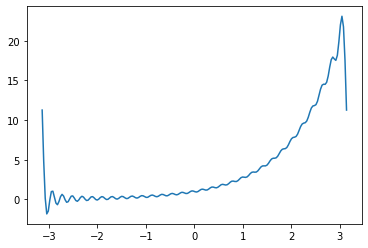

In [6]:
F=fourier(30)
plt.plot(X,F)

# 2) Using 
$$\int{f(x)dx} = h\sum{f(x_i)}$$

In [10]:
def f(x):
    return abs(np.sin(x))

In [11]:
X=np.linspace(-m.pi,m.pi,100)
period=2*m.pi
def fourier1(n):             ## integration done using f(x)*dx
    L=period/2
    h=2*m.pi/1000
    a0=0
    for i in range(0,len(X)):
        a0+=f(i)*h
    
    an=[]
    for i in range(1,n+1):
        t=0
        for j in range(0,len(X)):
            t+=f(X[j])*(np.cos(i*m.pi*X[j]/L))*h
        an.append(t)
    
    bn=[]
    for i in range(1,n+1):
        t=0
        for j in range(0,len(X)):
            t+=f(X[j])*(np.sin(i*m.pi*X[j]/L))*h
        bn.append(t)
        
    F=[]
    for i in range(0,len(X)):
        sum = a0/2 
        for j in range(0,len(an)):
            sum+=(m.cos((j+1)*m.pi*X[i]/L))*an[j]+(m.sin((j+1)*m.pi*X[i]/L))*bn[j]
        F.append(sum)
    return F  

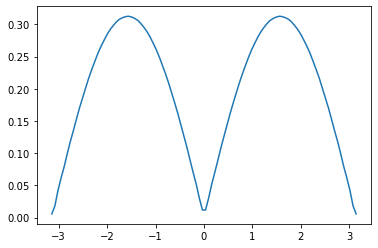

In [12]:
F1=fourier1(30)
plt.plot(X,F1)